# IGFAE Lambda->pmunu Research

In [1]:
from numpy import *
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
pip install uproot

Note: you may need to restart the kernel to use updated packages.


In [2]:
import uproot

In [3]:
file = uproot.open("GenLpmu2018MD_wMpi.root")  #This is our Lambda->pmunu signal simulation
file2 = uproot.open("GenLppi2018MD_wMpi.root") ##This is our Lambda->ppi background
tree = file["T"]
tree2= file2["T"]

In [4]:
pd_Signal=tree.arrays(library='pd')  
#here we create our dataframes, just with Lambda0_M and Lambda0_PT variables
pd_Background=tree2.arrays(library='pd') 

/Users/dan-ioanbultoc/opt/anaconda3/lib/python3.9/site-packages/uproot/interpretation/library.py:798: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  out[name] = series[name]


In [5]:
cutsSignal=(abs(pd_Signal['Lambda0_TRUEID'])==3122) & (abs(pd_Signal['p_TRUEID'])==2212) & (abs(pd_Signal['mu_TRUEID'])==13) & (abs(pd_Signal['mu_MC_MOTHER_ID'])==3122) & (abs(pd_Signal['p_MC_MOTHER_ID'])==3122) & (pd_Signal['Lambda0_TRUEENDVERTEX_Z']==pd_Signal['mu_TRUEORIGINVERTEX_Z'])

pd_SignalCuts=pd_Signal[cutsSignal]

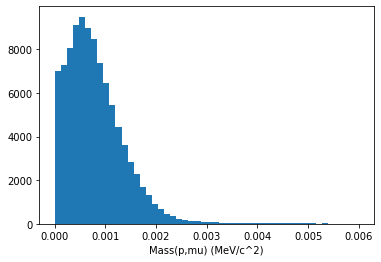

In [6]:
plt.hist(pd_SignalCuts['APLA'], range=[0,0.006], bins=50)
plt.xlabel('Mass(p,mu) (MeV/c^2)')
plt.show()

In [7]:
cutsLppi=(abs(pd_Background['Lambda0_TRUEID'])==3122) & (abs(pd_Background['p_TRUEID'])==2212) & (abs(pd_Background['mu_TRUEID'])==211) & (abs(pd_Background['mu_MC_MOTHER_ID'])==3122) & (abs(pd_Background['p_MC_MOTHER_ID'])==3122) & (pd_Background['Lambda0_TRUEENDVERTEX_Z']==pd_Background['mu_TRUEORIGINVERTEX_Z'])
#pd_BackgroundCuts=pd_Background[(abs(pd_Background['Lambda0_TRUEID'])==3122) & (abs(pd_Background['p_TRUEID'])==2212) & (abs(pd_Background['mu_TRUEID'])==211) & (abs(pd_Background['mu_MC_MOTHER_ID'])==3122) & (abs(pd_Background['p_MC_MOTHER_ID'])==3122)]
pd_BackgroundCutsLppi=pd_Background[cutsLppi]


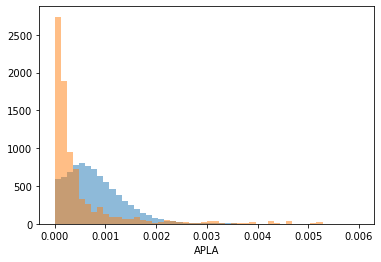

In [27]:
plt.hist(pd_SignalCuts['APLA'], range=[0,0.006], bins=50, alpha=0.5, density=True)
plt.hist(pd_BackgroundCutsLppi['APLA'], range=[0,0.006], bins=50, alpha=0.5, density=True)
plt.xlabel('APLA')
plt.show()

In [10]:
cutsEDIF=(abs(pd_Background['Lambda0_TRUEID']==3122)) & (abs(pd_Background['p_TRUEID']==2212)) & (abs(pd_Background['mu_TRUEID'])==13) & (abs(pd_Background['p_MC_MOTHER_ID'])==3122) & (abs(pd_Background['mu_MC_MOTHER_ID'])==211) & (abs(pd_Background['mu_MC_GD_MOTHER_ID'])==3122) & (pd_Background['Lambda0_TRUEENDVERTEX_Z']!=pd_Background["mu_TRUEORIGINVERTEX_Z"])

pd_eDIF=pd_Background[cutsEDIF]


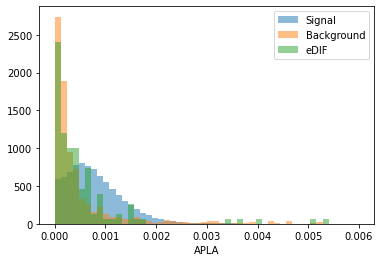

In [28]:
#2
plt.hist(pd_SignalCuts['APLA'], range=[0,0.006], bins=50, alpha=0.5, density=True, label='Signal')
plt.hist(pd_BackgroundCutsLppi['APLA'], range=[0,0.006], bins=50, alpha=0.5, density=True, label='Background')
plt.hist(pd_eDIF['APLA'], density=True, alpha=0.5, label='eDIF', bins=50, range=[0,0.006])
plt.xlabel('APLA')
plt.legend()
plt.show()

# TASKS

1. Is this a good variable to separate signal and background? 

2. Include eDIF Channel in the histogram. 

3. Interesting properties of your histogram with 3 channels.

4. Create different 2-Dimensional histograms for each channel. In each 2D Hist you should have as x-axis APLA and as y-axis 

In [ ]:
#1 no because there is significant overlap between background and signal. we can separate after 0.002
#3 

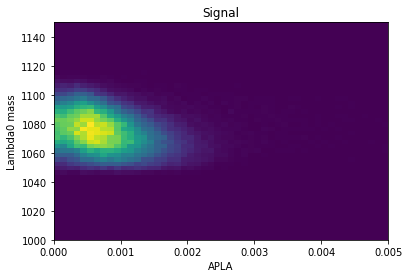

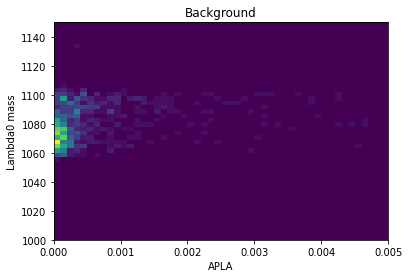

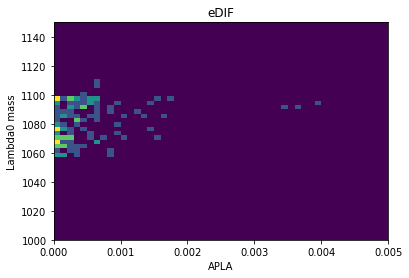

In [50]:
plt.hist2d(pd_SignalCuts['APLA'], pd_SignalCuts['Lambda0_M'], bins=(50,50), range=([0,0.005], [1000,1150]))
plt.title('Signal')
plt.xlabel('APLA')
plt.ylabel('Lambda0 mass')
plt.show()

plt.hist2d(pd_BackgroundCutsLppi['APLA'], pd_BackgroundCutsLppi['Lambda0_M'], bins=(50,50), range=([0,0.005], [1000,1150]))
plt.title('Background')
plt.xlabel('APLA')
plt.ylabel('Lambda0 mass')
plt.show()


plt.hist2d(pd_eDIF['APLA'], pd_eDIF['Lambda0_M'], bins=(50,50), range=([0,0.005], [1000,1150]))
plt.title('eDIF')
plt.xlabel('APLA')
plt.ylabel('Lambda0 mass')
plt.show()

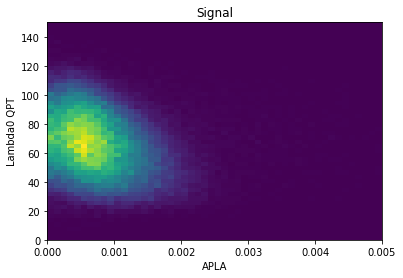

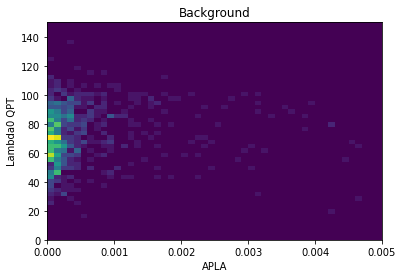

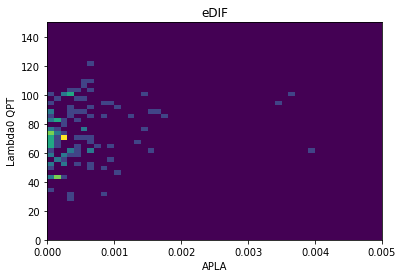

In [53]:
#Lambda0 QPT

plt.hist2d(pd_SignalCuts['APLA'], pd_SignalCuts['Lambda0_QPT'], bins=(50,50), range=([0,0.005], [0,150]))
plt.title('Signal')
plt.xlabel('APLA')
plt.ylabel('Lambda0 QPT')
plt.show()

plt.hist2d(pd_BackgroundCutsLppi['APLA'], pd_BackgroundCutsLppi['Lambda0_QPT'], bins=(50,50), range=([0,0.005], [0,150]))
plt.title('Background')
plt.xlabel('APLA')
plt.ylabel('Lambda0 QPT')
plt.show()


plt.hist2d(pd_eDIF['APLA'], pd_eDIF['Lambda0_QPT'], bins=(50,50), range=([0,0.005], [0,150]))
plt.title('eDIF')
plt.xlabel('APLA')
plt.ylabel('Lambda0 QPT')
plt.show()

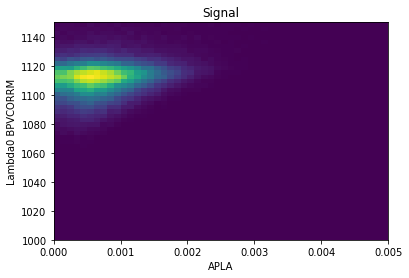

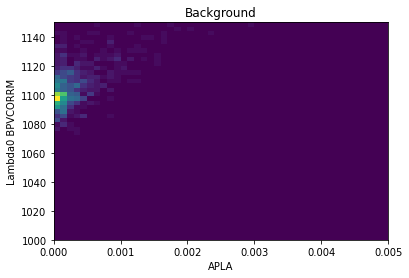

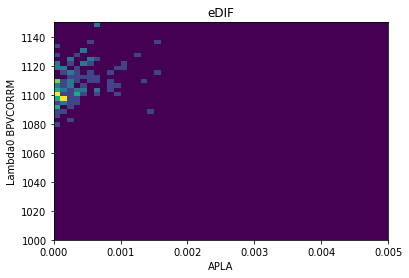

In [67]:
#Lambda0 BPVCORRM

plt.hist2d(pd_SignalCuts['APLA'], pd_SignalCuts['Lambda0_BPVCORRM'],bins=(50,50),range=([0,0.005],[1000,1150]))
plt.title('Signal')
plt.xlabel('APLA')
plt.ylabel('Lambda0 BPVCORRM')
plt.show()

plt.hist2d(pd_BackgroundCutsLppi['APLA'], pd_BackgroundCutsLppi['Lambda0_BPVCORRM'],bins=(50,50),range=([0,0.005],[1000,1150]))
plt.title('Background')
plt.xlabel('APLA')
plt.ylabel('Lambda0 BPVCORRM')
plt.show()


plt.hist2d(pd_eDIF['APLA'], pd_eDIF['Lambda0_BPVCORRM'],range=([0,0.005],[1000,1150]),bins=(50,50))
plt.title('eDIF')
plt.xlabel('APLA')
plt.ylabel('Lambda0 BPVCORRM')
plt.show()

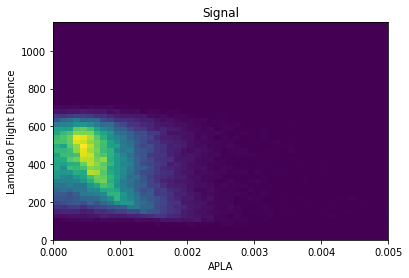

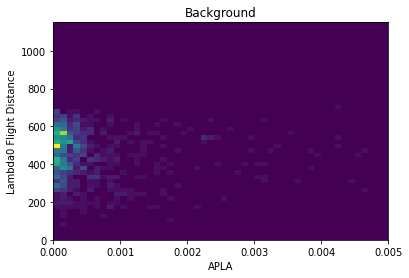

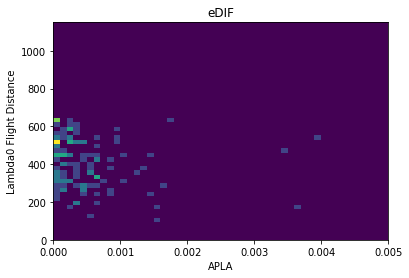

In [70]:
#Lambda0 flight distance

plt.hist2d(pd_SignalCuts['APLA'], pd_SignalCuts['Lambda0_FD_OWNPV'], bins=(50,50), range=([0,0.005],[0,1150]))
plt.title('Signal')
plt.xlabel('APLA')
plt.ylabel('Lambda0 Flight Distance')
plt.show()

plt.hist2d(pd_BackgroundCutsLppi['APLA'], pd_BackgroundCutsLppi['Lambda0_FD_OWNPV'], bins=(50,50), range=([0,0.005],[0,1150]))
plt.title('Background')
plt.xlabel('APLA')
plt.ylabel('Lambda0 Flight Distance')
plt.show()


plt.hist2d(pd_eDIF['APLA'], pd_eDIF['Lambda0_FD_OWNPV'], bins=(50,50), range=([0,0.005],[0,1150]))
plt.title('eDIF')
plt.xlabel('APLA')
plt.ylabel('Lambda0 Flight Distance')
plt.show()

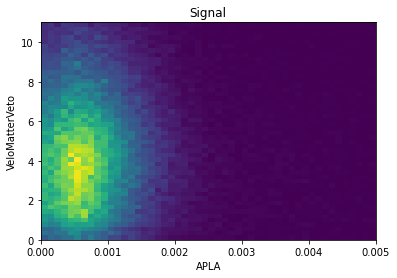

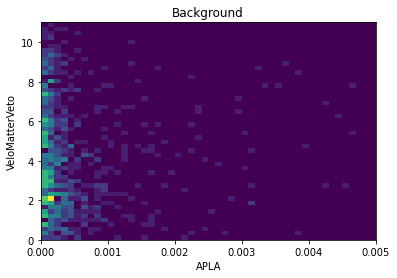

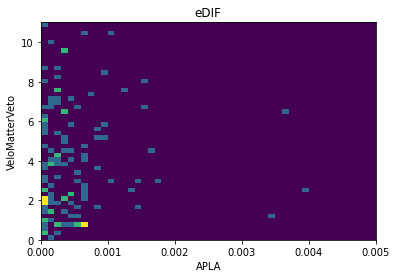

In [71]:
#Velo Matter Veto

plt.hist2d(pd_SignalCuts['APLA'], pd_SignalCuts['VeloMatterVeto'],bins=(50,50),range=([0,0.005],[0,11]))
plt.title('Signal')
plt.xlabel('APLA')
plt.ylabel('VeloMatterVeto')
plt.show()

plt.hist2d(pd_BackgroundCutsLppi['APLA'], pd_BackgroundCutsLppi['VeloMatterVeto'],bins=(50,50),range=([0,0.005],[0,11]))
plt.title('Background')
plt.xlabel('APLA')
plt.ylabel('VeloMatterVeto')
plt.show()


plt.hist2d(pd_eDIF['APLA'], pd_eDIF['VeloMatterVeto'],bins=(50,50),range=([0,0.005],[0,11]))
plt.title('eDIF')
plt.xlabel('APLA')
plt.ylabel('VeloMatterVeto')
plt.show()
#signal has intense peak - easy to distinguish

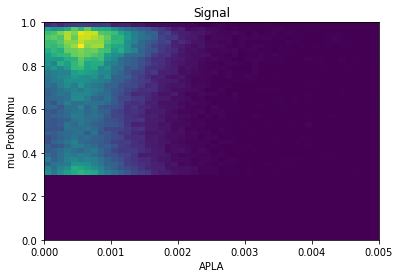

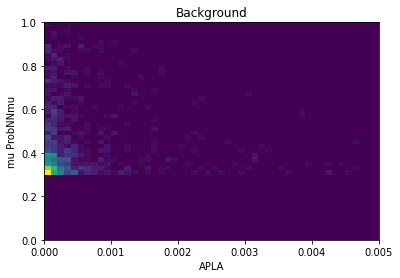

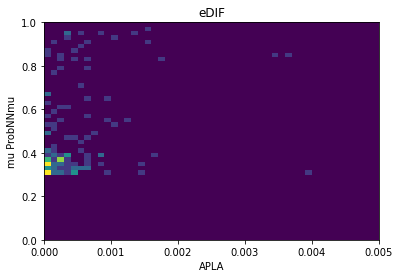

In [72]:
#mu_ProbNNmu

plt.hist2d(pd_SignalCuts['APLA'], pd_SignalCuts['mu_ProbNNmu'],bins=(50,50),range=([0,0.005],[0,1]))
plt.title('Signal')
plt.xlabel('APLA')
plt.ylabel('mu ProbNNmu')
plt.show()

plt.hist2d(pd_BackgroundCutsLppi['APLA'], pd_BackgroundCutsLppi['mu_ProbNNmu'],bins=(50,50),range=([0,0.005],[0,1]))
plt.title('Background')
plt.xlabel('APLA')
plt.ylabel('mu ProbNNmu')
plt.show()


plt.hist2d(pd_eDIF['APLA'], pd_eDIF['mu_ProbNNmu'],bins=(50,50),range=([0,0.005],[0,1]))
plt.title('eDIF')
plt.xlabel('APLA')
plt.ylabel('mu ProbNNmu')
plt.show()

#peak signal values different from peak background

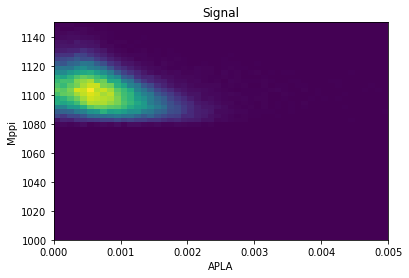

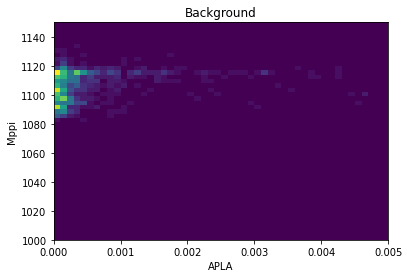

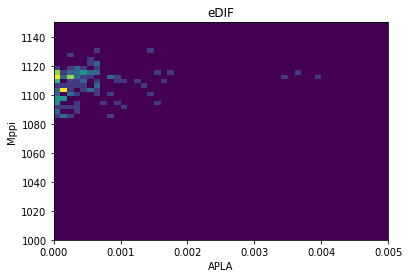

In [73]:
#Mppi

plt.hist2d(pd_SignalCuts['APLA'], pd_SignalCuts['Mppi'],bins=(50,50),range=([0,0.005],[1000,1150]))
plt.title('Signal')
plt.xlabel('APLA')
plt.ylabel('Mppi')
plt.show()

plt.hist2d(pd_BackgroundCutsLppi['APLA'], pd_BackgroundCutsLppi['Mppi'],bins=(50,50),range=([0,0.005],[1000,1150]))
plt.title('Background')
plt.xlabel('APLA')
plt.ylabel('Mppi')
plt.show()


plt.hist2d(pd_eDIF['APLA'], pd_eDIF['Mppi'],bins=(50,50),range=([0,0.005],[1000,1150]))
plt.title('eDIF')
plt.xlabel('APLA')
plt.ylabel('Mppi')
plt.show()

#easy to distinguish signal - peak signal

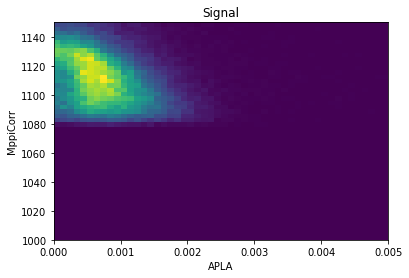

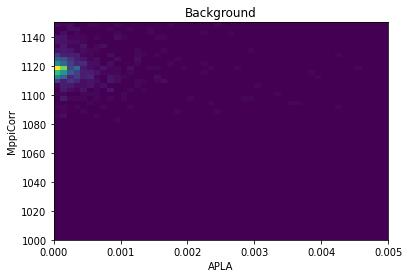

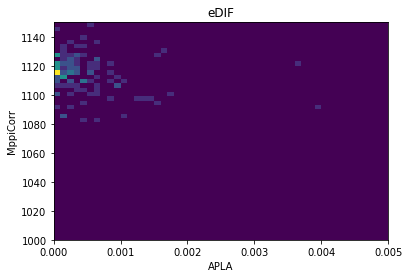

In [74]:
#MppiCorr

plt.hist2d(pd_SignalCuts['APLA'], pd_SignalCuts['MppiCorr'],bins=(50,50),range=([0,0.005],[1000,1150]))
plt.title('Signal')
plt.xlabel('APLA')
plt.ylabel('MppiCorr')
plt.show()

plt.hist2d(pd_BackgroundCutsLppi['APLA'], pd_BackgroundCutsLppi['MppiCorr'],bins=(50,50),range=([0,0.005],[1000,1150]))
plt.title('Background')
plt.xlabel('APLA')
plt.ylabel('MppiCorr')
plt.show()


plt.hist2d(pd_eDIF['APLA'], pd_eDIF['MppiCorr'],bins=(50,50),range=([0,0.005],[1000,1150]))
plt.title('eDIF')
plt.xlabel('APLA')
plt.ylabel('MppiCorr')
plt.show()

#easy to distinguish signal from background - peak signal

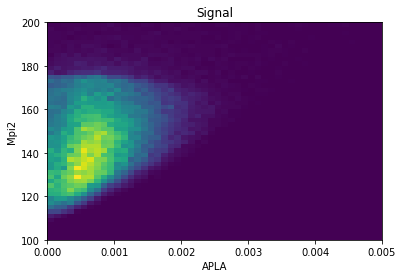

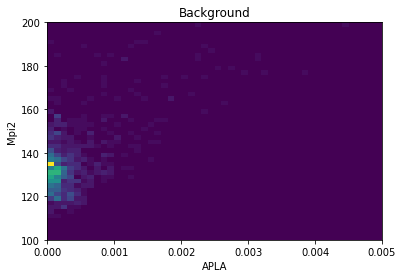

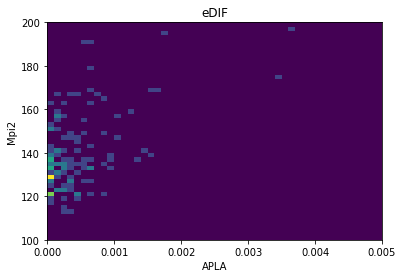

In [75]:
#Mpi2

plt.hist2d(pd_SignalCuts['APLA'], pd_SignalCuts['Mpi2'],bins=(50,50),range=([0,0.005],[100,200]))
plt.title('Signal')
plt.xlabel('APLA')
plt.ylabel('Mpi2')
plt.show()

plt.hist2d(pd_BackgroundCutsLppi['APLA'], pd_BackgroundCutsLppi['Mpi2'],bins=(50,50),range=([0,0.005],[100,200]))
plt.title('Background')
plt.xlabel('APLA')
plt.ylabel('Mpi2')
plt.show()


plt.hist2d(pd_eDIF['APLA'], pd_eDIF['Mpi2'],bins=(50,50),range=([0,0.005],[100,200]))
plt.title('eDIF')
plt.xlabel('APLA')
plt.ylabel('Mpi2')
plt.show()

#easy to distinguish signal from background